In [2]:
import torch
from torchvision import models
from torch import nn
import numpy as np
from torchsummary import summary

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

In [4]:
model = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\ian/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [5]:
children_counter = 0
for n,c in model.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n)
    children_counter+=1

Children Counter:  0  Layer Name:  features
Children Counter:  1  Layer Name:  avgpool
Children Counter:  2  Layer Name:  classifier


In [7]:
model.modules

<bound method Module.modules of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2,

In [16]:
torch.nn.Sequential(*list(model.children())[:])

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
model._modules.keys()

odict_keys(['features', 'avgpool', 'classifier'])

In [21]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [25]:
model.classifier[-1].weight.shape

torch.Size([1000, 4096])

In [26]:
model.classifier[-1].out_features


1000

In [27]:
model = model.to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [28]:
from PIL import Image
from torchvision import transforms

In [29]:
filename = './images_test/cat.jpg'

In [30]:
input_image = Image.open(filename)

In [31]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.485, 0.456, 0.406), std = [0.229, 0.224, 0.225])
])

In [32]:
input_tensor = transform(input_image)

In [35]:
input_batch = input_tensor.unsqueeze(0).to(device)

In [40]:
model.eval()
with torch.no_grad():
    output = model(input_batch)

In [48]:
probabilities = torch.nn.functional.softmax(output[0], dim = 0)

In [55]:
print(f'{torch.argmax(probabilities).item()}: {torch.max(probabilities).item()}')


285: 0.6066890954971313


In [57]:
with open("imagenet.categories", "r") as f:
    # 取第一欄
    categories = [s.strip().split(',')[0] for s in f.readlines()]
categories[torch.argmax(probabilities).item()]

FileNotFoundError: [Errno 2] No such file or directory: 'imagenet.categories'

In [58]:
import torch
from torchvision import models
from torch import nn
from torchsummary import summary
import numpy as np

In [59]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [61]:
model = models.vgg16(pretrained = True)
model.modules

<bound method Module.modules of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2,

In [75]:
class new_model(nn.Module):
    def __init__(self, pretrained, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained = pretrained
        self.children_list = []
        
        for n, c in self.pretrained.named_children():
            self.children_list.append(c)
            if n == self.output_layer:
                print('found !!')
                break
        self.net = nn.Sequential(*self.children_list)
        self.pretrained = None
    def forward(self, x):
        x = self.net(x)
        return x
model = new_model(model, 'avgpool')
model = model.to(device)
model._modules

found !!


OrderedDict([('pretrained', None),
             ('net', Sequential(
                (0): Sequential(
                  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                  (1): ReLU(inplace=True)
                  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                  (3): ReLU(inplace=True)
                  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                  (6): ReLU(inplace=True)
                  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                  (8): ReLU(inplace=True)
                  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                  (11): ReLU(inplace=True)
                  (12): Conv2d(256, 256, k

In [76]:
model.modules

<bound method Module.modules of new_model(
  (pretrained): None
  (net): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddin

In [74]:
list(model.named_children())

[('features',
  Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

In [77]:
from PIL import Image
from torchvision import transforms

In [81]:
filename = './images_test/tiger2.jpg'
input_image = Image.open(filename)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [82]:
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    output = model(input_batch)
output

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.2639, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [2.1444, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3817],
          [1.5378, 0.0000, 0.0000,  ..., 0.0000, 2.0310, 5.3875],
          [0.0000, 0.0000, 0.0000,  ..., 0.5578, 2.1862, 6.1961]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3582, 0.6443],
          [0.6325, 0.0000, 0.0000,  ..., 0.0000, 1.9570, 1.9593],
          [2.0923, 0.3279, 0.0000,  ..., 0.0000, 0.0000, 1.4265],
          ...,
          [0.0000, 2.7189, 5.2889,  ..., 2.0368, 2.2243, 1.3909],
          [0.0000, 3.1237, 3.3685,  ..., 0.4262, 1.1930, 0.6169],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 2.0149,  ..., 0

In [83]:
print(output.shape)

torch.Size([1, 512, 7, 7])


In [84]:
from os import listdir
from os.path import isfile, join

In [88]:
img_path = './images_test/'
image_files = np.array([f for f in listdir(img_path) if isfile(join(img_path, f)) and f[-3:] == 'jpg'])

In [89]:
image_files

array(['astronaut.jpg', 'bird.jpg', 'bird2.jpg', 'cat.jpg', 'daisy1.jpg',
       'daisy2.jpg', 'deer.jpg', 'elephant.jpg', 'elephant2.jpg',
       'lion1.jpg', 'lion2.jpg', 'owl.jpg', 'panda1.jpg', 'panda2.jpg',
       'panda3.jpg', 'peacock.jpg', 'rose2.jpg', 'tiger1.jpg',
       'tiger2.jpg', 'tiger3.jpg', 'toucan.jpg'], dtype='<U13')

In [96]:
import os
model.eval()
x = torch.tensor([])

In [97]:
for filename in image_files:
    input_image = Image.open(os.path.join(img_path, filename))
    input_tensor = transform(input_image)
    input_batch = input_tensor.unsqueeze(0).to(device)
    if len(x.shape) == 1:
        x = input_batch
    else:
        x = torch.cat((x, input_batch), dim = 0)

In [98]:
with torch.no_grad():
    features = model(x)
features.shape

torch.Size([21, 512, 7, 7])

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
no = -2 
print(image_files[no])

tiger3.jpg


In [102]:
features2 = features.cpu().reshape((features.shape[0], -1))

In [113]:
other_features = np.concatenate((features2[:no], features2[no + 1:]))
similar_list = cosine_similarity(features2, other_features, dense_output = False)

In [112]:
similar_list

array([[0.9999999 , 0.05813711, 0.04339975, 0.06365152, 0.05540558,
        0.07560316, 0.05999345, 0.04194814, 0.0549625 , 0.04293375,
        0.08447523, 0.06783494, 0.07097944, 0.04038769, 0.05111516,
        0.04289774, 0.07881916, 0.05452679, 0.06588724, 0.04503619],
       [0.05813711, 1.0000002 , 0.17146686, 0.1471321 , 0.0413562 ,
        0.05581459, 0.14943112, 0.05143525, 0.08423477, 0.0606058 ,
        0.09888165, 0.24716558, 0.14372583, 0.06280698, 0.21038973,
        0.08878403, 0.08842303, 0.09075072, 0.10901843, 0.25219506],
       [0.04339975, 0.17146686, 0.9999995 , 0.129894  , 0.03902254,
        0.06473182, 0.06234483, 0.05915822, 0.14548272, 0.09194133,
        0.08504301, 0.11225588, 0.09479395, 0.0509206 , 0.09711492,
        0.07111394, 0.14107814, 0.1351856 , 0.12074561, 0.16043437],
       [0.06365152, 0.1471321 , 0.129894  , 1.0000005 , 0.13684137,
        0.08409561, 0.12928648, 0.18071142, 0.10394667, 0.20070007,
        0.14852   , 0.13730355, 0.15394069, 0

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np 
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [117]:
data_transforms = {'train': transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}

In [119]:
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                         data_transforms[x])
                 for x in ['train', 'val']}

In [122]:
dataloader = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size = 4, shuffle = True, num_workers = 4) for x in ['train', 'val']}

In [123]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [125]:
class_names = image_datasets['train'].classes

In [129]:
dataset_sizes

{'train': 244, 'val': 153}

In [130]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

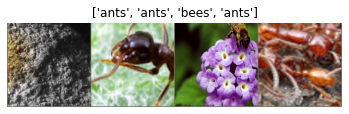

In [132]:
def imshow(inp, title = None):
    inp = inp.numpy().transpose(1, 2 ,0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
inputs, classes = next(iter(dataloader['train']))

# 顯示一批資料
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [134]:
inputs

tensor([[[[ 0.1768, -0.2342, -0.5938,  ..., -1.8953, -1.9467, -1.9295],
          [-0.9363, -0.6109,  0.7933,  ..., -1.9295, -1.9295, -1.9980],
          [-0.7822,  0.3309,  0.8961,  ..., -1.9638, -1.8953, -1.9124],
          ...,
          [ 1.2214,  1.1872,  1.4440,  ..., -0.3541, -0.6794, -1.4672],
          [ 1.8208,  1.9235,  1.1358,  ..., -0.1486, -0.4911, -1.4672],
          [ 1.0673,  1.2728,  0.7419,  ..., -0.1999, -0.9192, -1.0904]],

         [[ 0.3102, -0.1275, -0.4951,  ..., -1.8081, -1.8606, -1.8431],
          [-0.9153, -0.5476,  0.8880,  ..., -1.8431, -1.8431, -1.9132],
          [-0.7227,  0.4153,  0.9930,  ..., -1.8782, -1.8081, -1.8256],
          ...,
          [ 1.3782,  1.3431,  1.6057,  ..., -0.2325, -0.5651, -1.3704],
          [ 1.9909,  2.0959,  1.2906,  ..., -0.0224, -0.3725, -1.3704],
          [ 1.2206,  1.4307,  0.8880,  ..., -0.0749, -0.8102, -0.9853]],

         [[ 0.3916,  0.0082, -0.3578,  ..., -1.5779, -1.6302, -1.6127],
          [-0.7587, -0.4101,  

In [144]:
def train_model(model, criterion, optimizer, schediler, num_epochs = 25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = .0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            running_loss = .0
            running_correct = 0
            
            for inputs, labels in dataloader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data) 
            if phase == 'train':
                scheduler.step()
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                bes
                t_model_wts = copy.deepcopy(model.state_dict())
        print()
    time_elapsed = time.time() - since
    print('Training complete in {(time_elapsed // 60):.0f}m {(time_elapsed % 60):.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)
    return model

In [145]:
def imshow2(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

In [147]:
def visualize_model(model, num_images = 6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, dim = 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                plt.subplot(num_images // 4 + 1, 4, images_so_far) 
                plt.axis('off')
                plt.title(class_names[preds[j]])
                imshow2(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode = was_training)
                    return
        model.train(mode = was_training)
    plt.tight_layout()
    plt.show()

In [149]:
model_ft = models.resnet18(pretrained = True)

In [158]:
num_ftrs = model_ft.fc.in_features
model_ft.fc 

512